In [1]:
# Examination of the following hypotheses:
# Organic traffic does not differ from paid traffic in terms of CR (Conversion Rate) into target events.
# Traffic from mobile devices does not differ from traffic from desktop devices in terms of CR (Conversion Rate) into target events.
# Traffic from presence cities (Moscow and the Moscow region, St. Petersburg) does not differ from traffic from other regions in terms of CR (Conversion Rate) into target events.

# Product team's questions:
# From which sources/campaigns/devices/locations does the most target traffic come to us (both in terms of traffic volume and CR)?
# Which cars are in highest demand? Which cars have the best CR (Conversion Rate) into target events?
# Should we increase our presence on social media and allocate more advertising there?

In [2]:

import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

import pickle


In [3]:
df_ses = pd.read_pickle('ga_sessions.pkl')
df_ses.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [4]:
print('rows, columns:', df_ses.shape)
print('elements:', df_ses.size)

rows, columns: (1860042, 18)
elements: 33480756


In [5]:
df_out = df_ses.copy()

In [6]:
df_out.dtypes

session_id                  object
client_id                   object
visit_date                  object
visit_time                  object
visit_number                 int64
utm_source                  object
utm_medium                  object
utm_campaign                object
utm_adcontent               object
utm_keyword                 object
device_category             object
device_os                   object
device_brand                object
device_model                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
dtype: object

In [7]:
missing_values = (df_out.isna().sum()/len(df_out)*100).sort_values(ascending=False)
print('Percentage of missing values:')
print(missing_values)

Percentage of missing values:
device_model                99.121633
utm_keyword                 58.174009
device_os                   57.533002
utm_adcontent               18.043410
utm_campaign                11.806346
device_brand                 6.380394
utm_source                   0.005215
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
session_id                   0.000000
device_category              0.000000
client_id                    0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
geo_city                     0.000000
dtype: float64


In [8]:
!

In [9]:
!

In [10]:
#New Data Set hits

In [11]:
df_hits = pd.read_pickle('ga_hits.pkl')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None


In [12]:
print('rows, columns:', df_hits.shape)
print('elements:', df_hits.size)

rows, columns: (15726470, 11)
elements: 172991170


In [13]:
df_hits.dtypes

session_id         object
hit_date           object
hit_time          float64
hit_number          int64
hit_type           object
hit_referer        object
hit_page_path      object
event_category     object
event_action       object
event_label        object
event_value        object
dtype: object

In [14]:
missing_values = (df_hits.isna().sum()/len(df_hits)*100).sort_values(ascending=False)
print('Percentage of missing values:')
print(missing_values)

Percentage of missing values:
event_value       100.000000
hit_time           58.247795
hit_referer        39.899634
event_label        23.909905
session_id          0.000000
hit_date            0.000000
hit_number          0.000000
hit_type            0.000000
hit_page_path       0.000000
event_category      0.000000
event_action        0.000000
dtype: float64


In [15]:
!

In [16]:
!

In [17]:
!

In [18]:
#Hypothesis Testing 

In [19]:
#1

In [20]:
organic = ['organic','referral', '(none)']


paid = df_ses[df_ses['utm_medium'].apply(lambda x: x not in organic)]['utm_medium'].unique()

target = ['sub_car_claim_click', 'sub_car_claim_submit_click',
          'sub_open_dialog_click', 'sub_custom_question_submit_click',
          'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
          'sub_car_request_submit_click']

ads = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
         'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

paid_ex_ads_df = df_ses[df_ses['utm_medium'].isin(paid) & ~df_ses['utm_source'].isin(ads)]

In [21]:
#add traffic 
df_ses[df_ses.utm_medium.isin(paid)]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860035,9055398929844789828.1624891784.1624891784,2108374361.1624891972,2021-06-28,17:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,vXsFkagGabkcWKlgLzSg,NaN,NaN,mobile,None,Samsung,NaN,320x676,Chrome,Russia,Naro-Fominsk
1860036,9055401700113249881.1639446112.1639446112,2108375006.1639446105,2021-12-14,04:41:52,1,ZpYIoDJMcFzVoPFsHGJL,banner,TmThBvoCcwkCZZUWACYq,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,ZTE,NaN,360x640,Chrome,Russia,Blagoveshchensk
1860037,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,None,NaN,1920x1080,Chrome,Russia,Moscow
1860040,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk


In [22]:
#organic traffic
df_ses[df_ses.utm_medium.isin(organic)]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
5,9055447192389856083.1622453074.1622453074,2108385598.1622453075,2021-05-31,12:00:00,1,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Apple,NaN,375x812,Safari,Russia,Saint Petersburg
11,9055469620715506713.1628883994.1628883994,2108390820.1628883993,2021-08-13,22:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Samsung,NaN,412x869,Android Webview,Russia,Saint Petersburg
12,9055469620715506713.1633110583.1633110583,2108390820.1628883993,2021-10-01,20:00:00,2,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Samsung,NaN,412x869,Android Webview,Russia,Saint Petersburg
13,9055469620715506713.1635878177.1635878177,2108390820.1628883993,2021-11-02,21:36:17,3,gVRrcxiDQubJiljoTbGm,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Samsung,NaN,412x869,Android Webview,Russia,Sochi
28,9055505230298952295.1638478433.1638478433,2108399111.1638478439,2021-12-02,23:53:53,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,desktop,Windows,None,NaN,1536x864,Chrome,Russia,Balashikha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860026,9055355469082180480.1636350848.1636350848,2108364242.1636350848,2021-11-08,08:54:08,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x873,Chrome,Russia,Moscow
1860029,9055376699099939975.1630766214.1630766214,2108369185.1630766215,2021-09-04,17:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,desktop,None,,NaN,1920x1080,Chrome,Russia,Khimki
1860032,9055394269810294140.1629912447.1629912447,2108373276.1629912444,2021-08-25,20:00:00,1,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Samsung,NaN,360x800,Android Webview,Russia,Saint Petersburg
1860038,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,None,Apple,NaN,390x844,Safari,Russia,Stavropol


In [23]:
def cr_count(column, x):
    uniq_ses_df = df_hits[df_hits.session_id.isin(df_ses.session_id)]
    uniq_ses_id = uniq_ses_df.session_id.unique()
    
    target_df = df_hits[df_hits['event_action'].isin(target)]
    
    cr_df = target_df[target_df.session_id.isin(uniq_ses_id)]
    
    cr_count_df = df_ses[df_ses[column].isin(x)]
    cr_count_df[cr_count_df.session_id.isin(cr_df.session_id.unique())]
    
    result = (cr_count_df[cr_count_df.session_id.isin(cr_df.session_id.unique())].session_id.nunique() / cr_count_df.session_id.nunique())*100
    
    print(f'The conversion rate is: {result}%')


In [24]:
cr_count('utm_medium', organic)

The conversion rate is: 4.036000535237434%


In [25]:
cr_count('utm_medium', paid)

The conversion rate is: 2.1944639288060026%


In [26]:
# There’s pretty significant difference between organic and paid traffic. 
# Organic traffic has nearly 2 times higher CR into target event compare to paid traffic.

In [27]:
#2

In [28]:
def cr_count_single(column, x):
    uniq_ses_df = df_hits[df_hits.session_id.isin(df_ses.session_id)]
    uniq_ses_id = uniq_ses_df.session_id.unique()
    
    target_df = df_hits[df_hits['event_action'].isin(target)]
    
    cr_df = target_df[target_df.session_id.isin(uniq_ses_id)]
    
    cr_count_df = df_ses[df_ses[column] == x]
    cr_count_df[cr_count_df.session_id.isin(cr_df.session_id.unique())]
    
    result = (cr_count_df[cr_count_df.session_id.isin(cr_df.session_id.unique())].session_id.nunique() / cr_count_df.session_id.nunique())*100
    
    print(f'The conversion rate is: {result}%')

In [29]:
cr_count_single('device_category', 'mobile')

The conversion rate is: 2.6021936833797668%


In [30]:
cr_count_single('device_category', 'desktop')

The conversion rate is: 3.1382287120805312%


In [31]:
# Conversion Rate (CR) into target even on mobile devices is 0.5% lower than on desktop.
# This data might indicate that our mobile website version is less attractive to our customers.
# For more data related to this question require further investigation.

In [32]:
#3

In [33]:
presented_cities = [
    'Moscow', 'Saint Petersburg', 'Balashikha', 'Podolsk', 'Korolëv', 'Mytishchi', 'Lyubertsy', 'Krasnogorsk', 
    'Elektrostal', 'Odintsovo','Kolomna', 'Domodedovo', 'Serpukhov', 'Shchelkovo', 'Orekhovo-Zuyevo', 
    'Ramenskoye', 'Dolgoprudnyy','Zhukovskiy', 'Reutov', 'Pushkino', 'Sergiyev Posad', 'Noginsk', 'Lobnya', 
    'Ivanteyevka', 'Fryazino','Lytkarino', 'Klimovsk', 'Dzerzhinskiy', 'Moskovskiy', 'Kotelniki', 
    'Krasnoznamensk', 'Protvino','Losino-Petrovskiy', 'Kraskovo', 'Udelnaya', 'Moscow', 'Khimki', 
    'Orekhovo-Borisovo Yuzhnoye'
]

other_cities = [city for city in df_ses.geo_city.unique() if city not in presented_cities]

In [34]:
cr_count('geo_city', presented_cities)

The conversion rate is: 2.7977171023869523%


In [35]:
cr_count('geo_city', other_cities)

The conversion rate is: 2.5465285798133177%


In [36]:
# Conversion Rate (CR) into target even in Moscow, Moscow oblast and St. Petersburg is slightly higher (0.2%), 
# than in other regions where our service isn’t presented yet.

In [37]:
uniq_ses_df = df_hits[df_hits.session_id.isin(df_ses.session_id)]
uniq_ses_id = uniq_ses_df.session_id.unique()
    
target_df = df_hits[df_hits['event_action'].isin(target)]
    
cr_df = target_df[target_df.session_id.isin(uniq_ses_id)]
cr_df.drop_duplicates(subset=['session_id'])

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
4016,2744563715298057088.1640258436.1640258436,2021-12-23,843092.0,81,event,NaN,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,None
4045,3087297479839089634.1640268774.1640268774,2021-12-23,194144.0,22,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,None
4046,3156966333326004302.1640206419.1640206800,2021-12-23,327223.0,63,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,None
4047,3750243879753098158.1640272208.1640272208,2021-12-23,156992.0,20,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,None
4048,7518333712042258254.1640258901.1640258901,2021-12-23,170616.0,16,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS,None
...,...,...,...,...,...,...,...,...,...,...,...
15723721,866859001948841053.1636820407.1636820407,2021-11-13,425100.0,28,event,NaN,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,None
15723722,725494882160817053.1636818259.1636818259,2021-11-13,1085428.0,37,event,NaN,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,None
15725017,6722881759963235246.1636811710.1636811710,2021-11-13,94213.0,16,event,NaN,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,None
15725018,1257546673350997498.1636791806.1636791806,2021-11-13,175501.0,13,event,NaN,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_button_click,sub_car_claim_click,EsLbNNEnCkXWoaesnKlS,None


In [38]:
#len(uniq_ses_id)

In [39]:
cr_id_df = cr_df.drop_duplicates(subset=['session_id'])

In [40]:
hits_id = cr_id_df.session_id.unique()

In [41]:
target_ses_df = df_ses[df_ses.session_id.isin(hits_id)]

In [42]:
# Traffic from TOP 5 Advert campaigns. Volume perspective

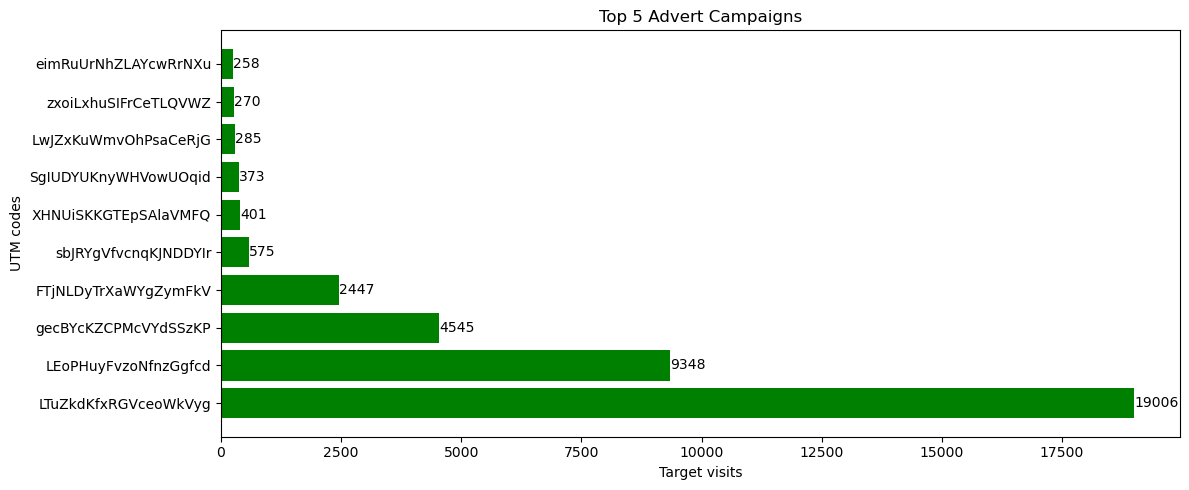

In [43]:
value_counts = target_ses_df.utm_campaign.value_counts().head(10)

campaigns = value_counts.index
counts = value_counts.values

plt.figure(figsize=(12, 5))
bars = plt.barh(campaigns, counts, color='green')

for bar, count in zip(bars, counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count}', 
             va='center', ha='left')
    
plt.xlabel('Target visits')
plt.ylabel('UTM codes')
plt.title('Top 5 Advert Campaigns')
plt.tight_layout()
plt.show()

In [44]:
# Traffic from TOP 5 Advert campaigns. CR perspective

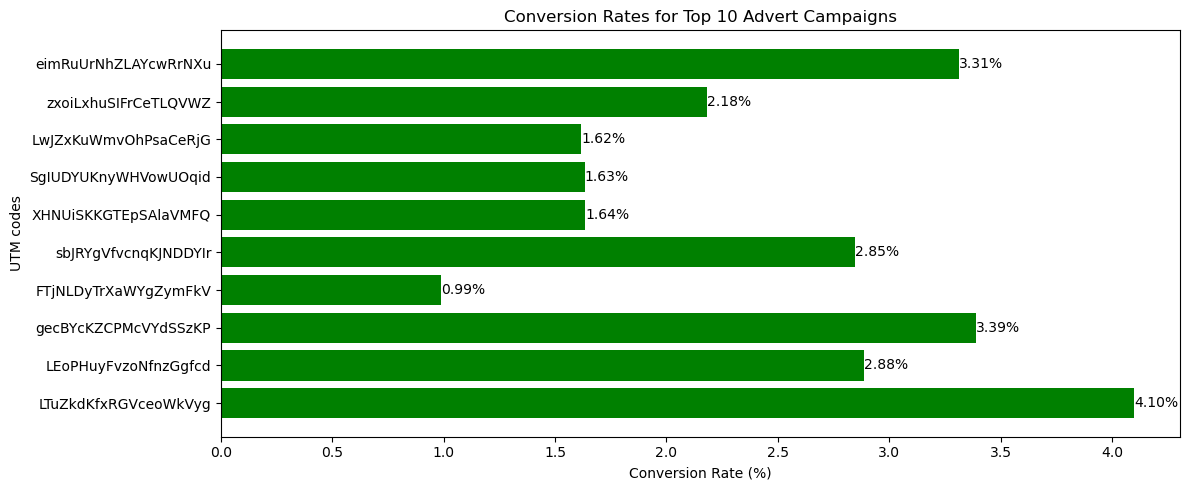

In [45]:
def calculate_conversion_rate(campaign_sessions, total_sessions_campaign):
    conversion_rate = (campaign_sessions / total_sessions_campaign) * 100 if total_sessions_campaign != 0 else 0
    return conversion_rate

value_counts = target_ses_df.utm_campaign.value_counts().head(10)

campaigns = value_counts.index
counts = value_counts.values

map_campaigns = {'LTuZkdKfxRGVceoWkVyg': 'LTuZkdKfxRGVceoWkVyg', 
                 'LEoPHuyFvzoNfnzGgfcd': 'LEoPHuyFvzoNfnzGgfcd',
                 'FTjNLDyTrXaWYgZymFkV': 'FTjNLDyTrXaWYgZymFkV',
                 'gecBYcKZCPMcVYdSSzKP': 'gecBYcKZCPMcVYdSSzKP',
                 'sbJRYgVfvcnqKJNDDYIr': 'sbJRYgVfvcnqKJNDDYIr',
                 'XHNUiSKKGTEpSAlaVMFQ': 'XHNUiSKKGTEpSAlaVMFQ',
                 'SgIUDYUKnyWHVowUOqid': 'SgIUDYUKnyWHVowUOqid',
                 'LwJZxKuWmvOhPsaCeRjG': 'LwJZxKuWmvOhPsaCeRjG',
                 'zxoiLxhuSIFrCeTLQVWZ': 'zxoiLxhuSIFrCeTLQVWZ',
                 'eimRuUrNhZLAYcwRrNXu': 'eimRuUrNhZLAYcwRrNXu'}

total_sessions_all_campaigns = df_ses.utm_campaign.value_counts()

conversion_rates = []
for campaign, count in zip(campaigns, counts):
    corresponding_campaign = map_campaigns.get(campaign)
    if corresponding_campaign:
        total_sessions_campaign = total_sessions_all_campaigns.loc[corresponding_campaign]
        conversion_rate = calculate_conversion_rate(count, total_sessions_campaign)
        conversion_rates.append(conversion_rate)

plt.figure(figsize=(12, 5))
bars = plt.barh(campaigns, conversion_rates, color='green')

for bar, rate in zip(bars, conversion_rates):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{rate:.2f}%', 
             va='center', ha='left')
    
plt.xlabel('Conversion Rate (%)')
plt.ylabel('UTM codes')
plt.title('Conversion Rates for Top 10 Advert Campaigns')
plt.tight_layout()
plt.show()


In [46]:
# Traffic from devices. Volume perspective

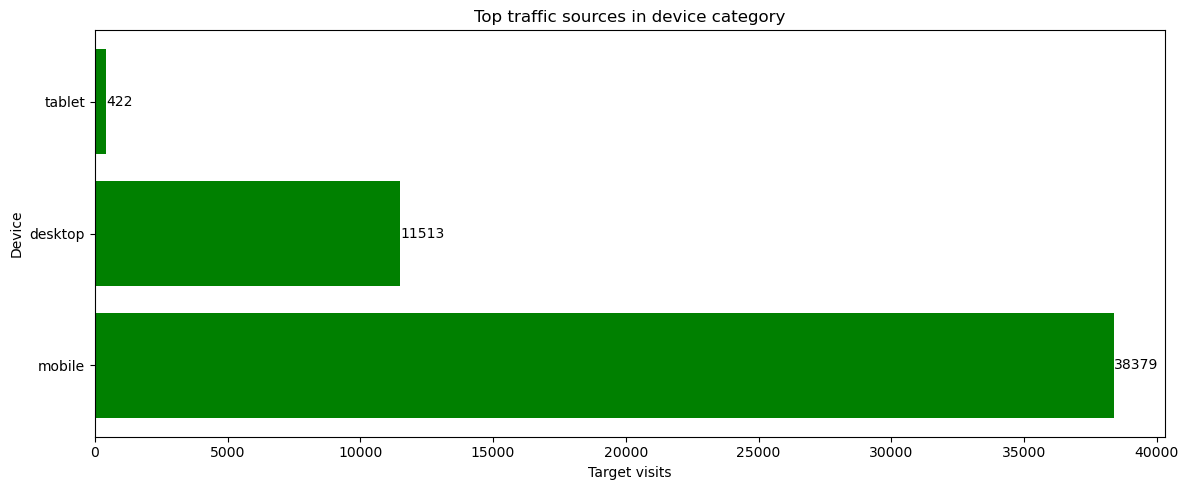

In [47]:
value_counts = target_ses_df.device_category.value_counts()

campaigns = value_counts.index
counts = value_counts.values

plt.figure(figsize=(12, 5))
bars = plt.barh(campaigns, counts, color='green')

for bar, count in zip(bars, counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count}', 
             va='center', ha='left')
    
plt.xlabel('Target visits')
plt.ylabel('Device')
plt.title('Top traffic sources in device category')
plt.tight_layout()
plt.show()

In [48]:
# Traffic from devices. CR perspective

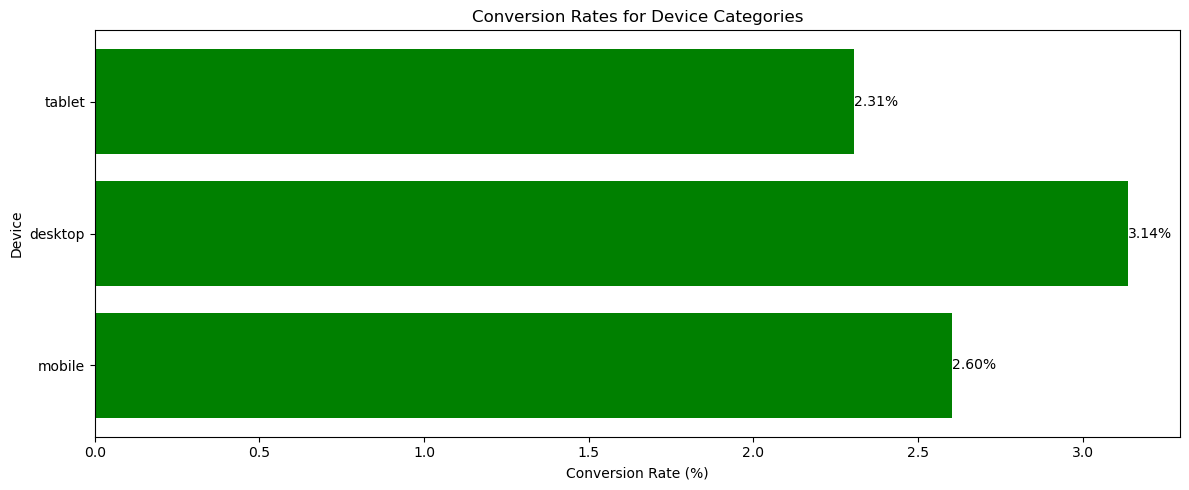

In [49]:
def calculate_conversion_rate(device_category_sessions, total_sessions_device_category):
    conversion_rate = (device_category_sessions / total_sessions_device_category) * 100 if total_sessions_device_category != 0 else 0
    return conversion_rate

value_counts = target_ses_df.device_category.value_counts()

campaigns = value_counts.index
counts = value_counts.values

total_sessions_all_device_categories = df_ses.device_category.value_counts()

conversion_rates = []
for device_category, count in zip(campaigns, counts):
    total_sessions_device_category = total_sessions_all_device_categories.loc[device_category]
    conversion_rate = calculate_conversion_rate(count, total_sessions_device_category)
    conversion_rates.append(conversion_rate)

plt.figure(figsize=(12, 5))
bars = plt.barh(campaigns, conversion_rates, color='green')

for bar, rate in zip(bars, conversion_rates):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{rate:.2f}%', 
             va='center', ha='left')
    
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Device')
plt.title('Conversion Rates for Device Categories')
plt.tight_layout()
plt.show()


In [50]:
# Traffic in cities. Volume perspective

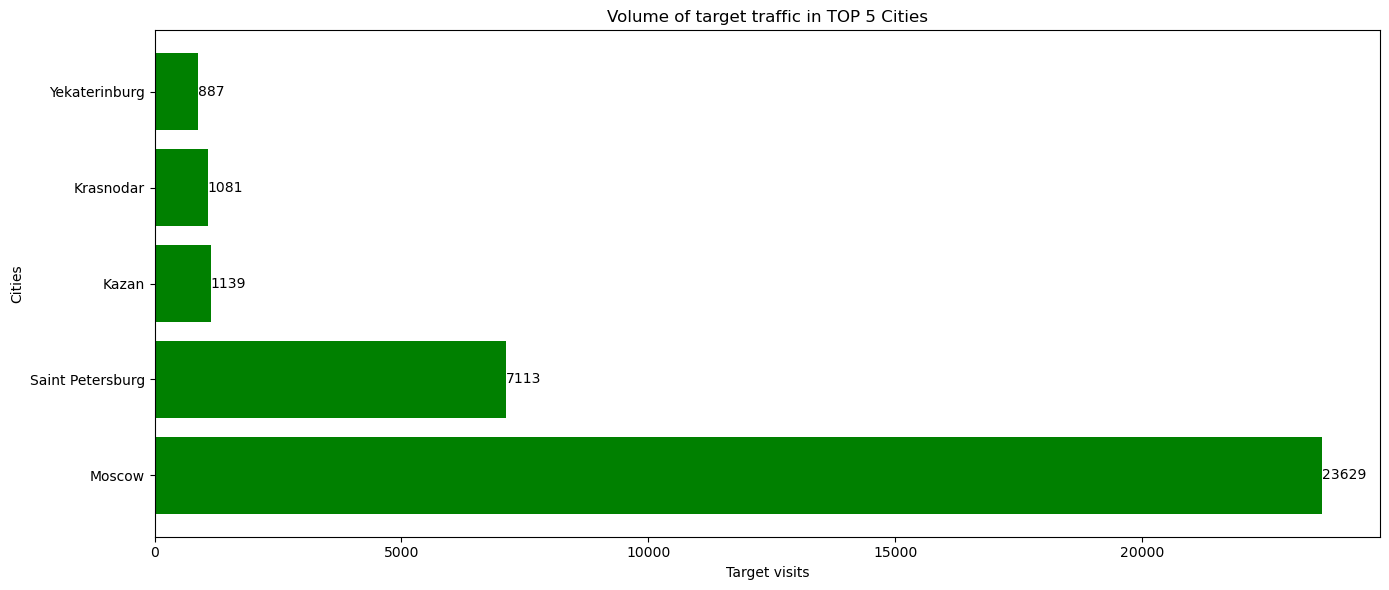

In [51]:
value_counts = target_ses_df.geo_city.value_counts().head(6)

if "(not set)" in value_counts.index:
    value_counts = value_counts.drop("(not set)")

cities = value_counts.index
counts = value_counts.values

plt.figure(figsize=(14, 6))
bars = plt.barh(cities, counts, color='green')

for bar, count in zip(bars, counts):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{count}',
             va='center', ha='left')

plt.xlabel('Target visits')
plt.ylabel('Cities')
plt.title('Volume of target traffic in TOP 5 Cities')
plt.tight_layout()
plt.show()

In [52]:
# Traffic in cities. CR perspective

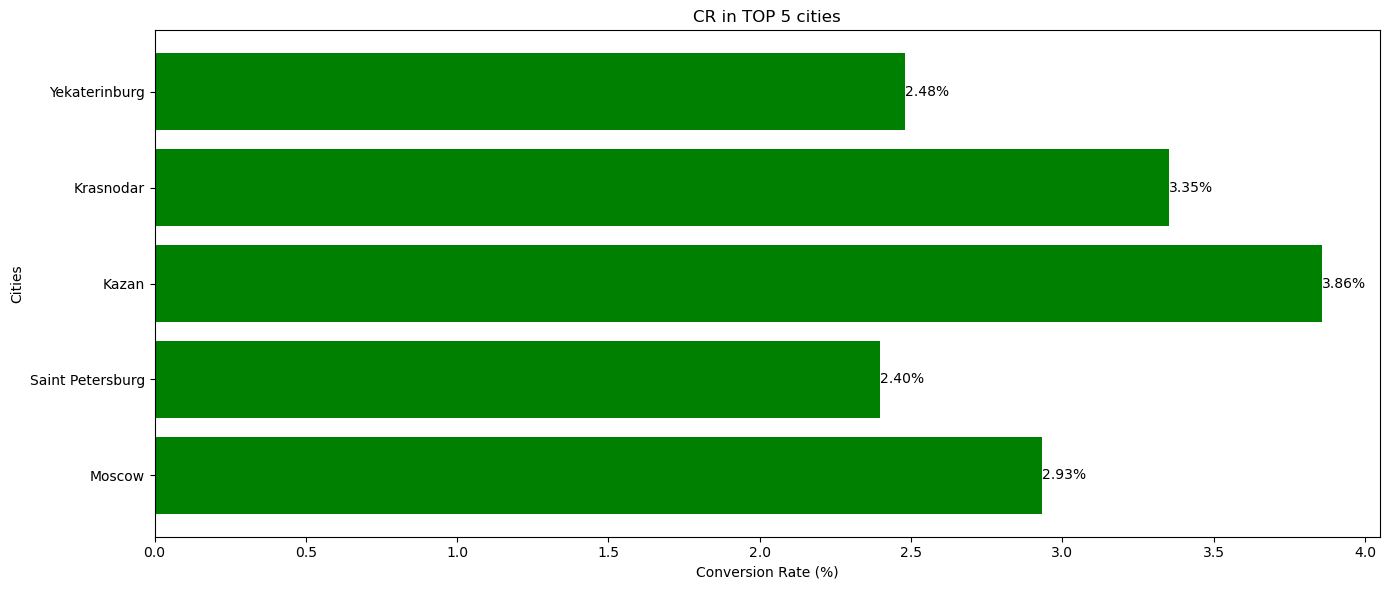

In [53]:
def calculate_conversion_rate(city_sessions, total_sessions_city):
    conversion_rate = (city_sessions / total_sessions_city) * 100 if total_sessions_city != 0 else 0
    return conversion_rate

value_counts = target_ses_df.geo_city.value_counts().head(6)

if "(not set)" in value_counts.index:
    value_counts = value_counts.drop("(not set)")

cities = value_counts.index
counts = value_counts.values

total_sessions_all_cities = df_ses.geo_city.value_counts()

conversion_rates = []
for city, count in zip(cities, counts):
    total_sessions_city = total_sessions_all_cities.loc[city]
    conversion_rate = calculate_conversion_rate(count, total_sessions_city)
    conversion_rates.append(conversion_rate)

plt.figure(figsize=(14, 6))
bars = plt.barh(cities, conversion_rates, color='green')

for bar, rate in zip(bars, conversion_rates):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{rate:.2f}%',
             va='center', ha='left')

plt.xlabel('Conversion Rate (%)')
plt.ylabel('Cities')
plt.title('CR in TOP 5 cities')
plt.tight_layout()
plt.show()


In [54]:
#

In [55]:
#

In [56]:
#

In [57]:
# TOP 10 popular auto in our service

In [58]:
auto_df = pd.DataFrame(target_df[['hit_page_path', 'session_id']])

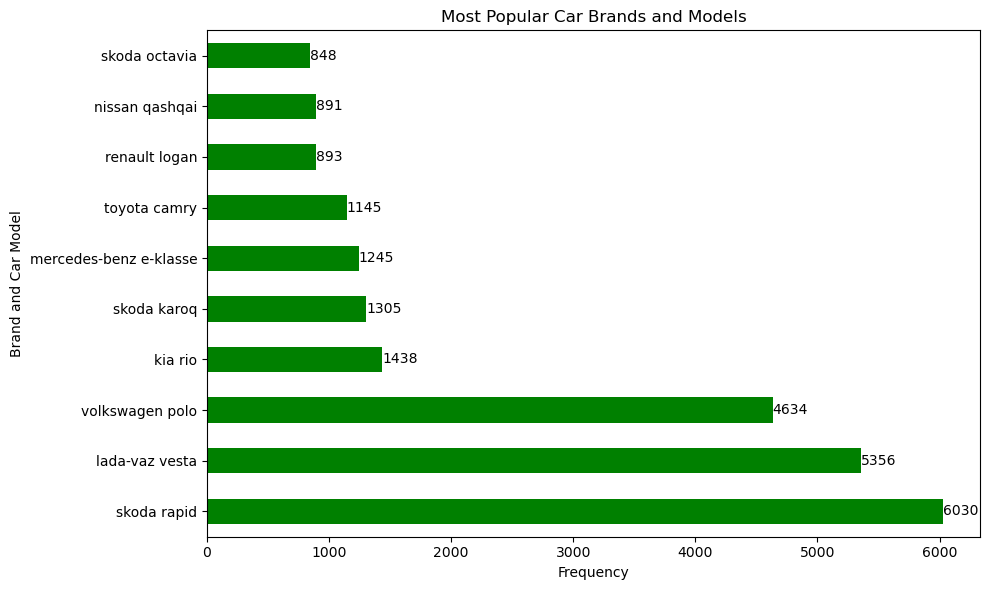

In [59]:
brand_model_cr = auto_df['hit_page_path'].str.extract(r'.*/(.*?)/(.*?)/.*')

brand_model_cr = brand_model_cr.loc[brand_model_cr[0].str.len() <= 15]

model_counts = brand_model_cr.apply(lambda x: ' '.join(x), axis=1).value_counts().head(10)

plt.figure(figsize=(10, 6))
model_counts.plot(kind='barh', color='green')
for i, count in enumerate(model_counts):
    plt.text(count, i, f'{count}', va='center', ha='left')
plt.xlabel('Frequency')
plt.ylabel('Brand and Car Model')
plt.title('Most Popular Car Brands and Models')
plt.tight_layout()
plt.show()

In [60]:
brand_model_cr

,0,1
4016,kia,rio
4045,skoda,rapid
4046,skoda,rapid
4047,nissan,x-trail
4048,mercedes-benz,gla-klasse
...,...,...
15725025,lada-vaz,vesta
15725133,volkswagen,polo
15725134,volkswagen,polo
15725135,volkswagen,polo


In [61]:
# TOP 5 auto in our service. CR perspective

In [62]:
cross_ses_df = df_hits[df_hits.session_id.isin(df_ses.session_id)]

uniq_ses_df = cross_ses_df.drop_duplicates(subset=['session_id'])

brand_model_full = uniq_ses_df['hit_page_path'].str.extract(r'.*/(.*?)/(.*?)/.*')

brand_model_full.dropna(inplace=True)

brand_model_full

,0,1
2,volkswagen,polo
4,mercedes-benz,cla-klasse
7,mercedes-benz,glc
8,kia,sorento
9,nissan,x-trail
...,...,...
15718392,volkswagen,touareg
15724633,lada-vaz,vesta
15726423,volkswagen,touareg
15726425,renault,logan


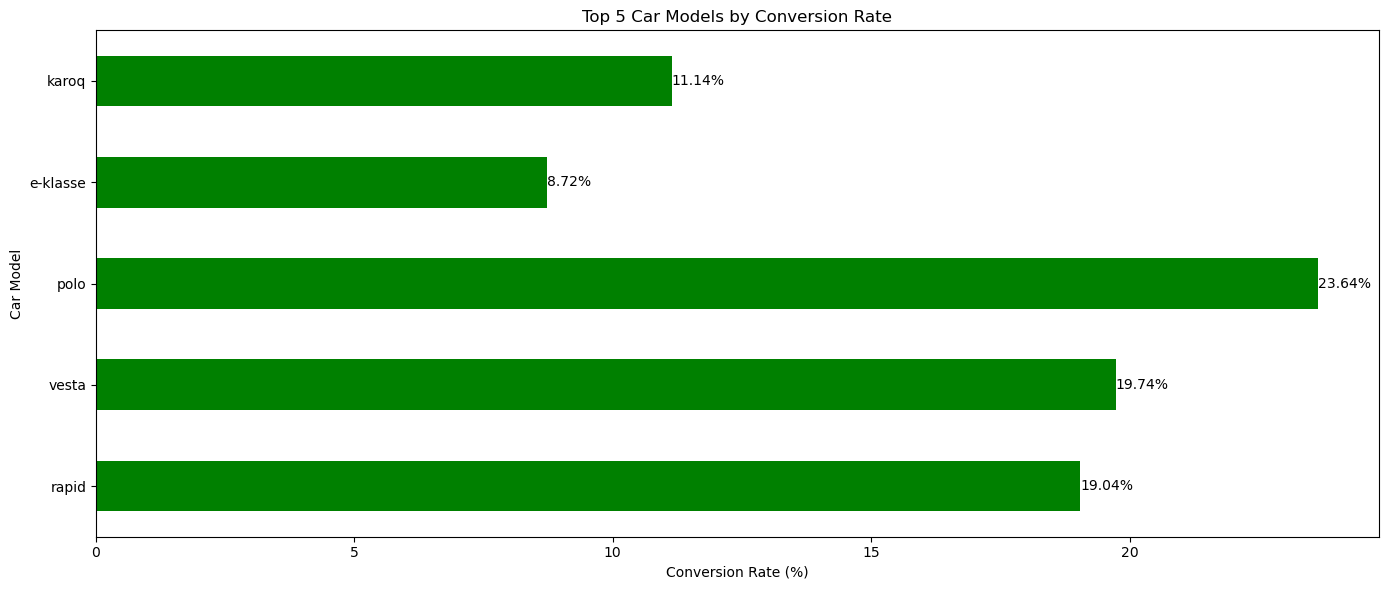

In [63]:
total_sessions_model = brand_model_full[1].value_counts()

target_sessions_model = brand_model_cr[1].value_counts()

conversion_rates_model = (target_sessions_model / total_sessions_model) * 100

top_models = total_sessions_model.head(5).index

plt.figure(figsize=(14, 6))
conversion_rates_model[top_models].plot(kind='barh', color='green')
for i, model in enumerate(top_models):
    rate = conversion_rates_model[model]
    plt.text(rate, i, f'{rate:.2f}%', va='center', ha='left')
plt.xlabel('Conversion Rate (%)')
plt.ylabel('Car Model')
plt.title('Top 5 Car Models by Conversion Rate')
plt.tight_layout()
plt.show()

In [64]:
#

In [65]:
#

In [66]:
#

In [67]:
#

In [68]:
target_ses_df[target_ses_df.utm_source.isin(adds)]

NameError: name 'adds' is not defined

In [ ]:
# total visits from ADS
df_ses[df_ses.utm_source.isin(ads)]

In [ ]:
cr_count('utm_source', ads)

In [ ]:
# CR (Conversion Rate) of 1.46% is much lower than CR from other sources. 
# However is not low enough to remove this source completely, so it is advised to increase ADS budget 
# and increase our presents on the markets